# 파이썬의 문자열 처리

<img src='images/string1.jpg' width=500 height=400>

In [ ]:
site = 'web-is-free'
print(site.split('-'))
site = [ "web", "is", "free" ]
print("-".join(site))

In [ ]:
import re
word = "JAVA   가나다 javascript Aa 가나다 AAaAaA123 %^&* 파이썬"
print(re.sub("A", "", word))
print(re.sub("a", "", word)) 
print(re.sub("Aa", "", word)) 
print(re.sub("(Aa){2}", "", word)) # {}는 횟수 기능. ()로 묶어줘야 한다. = 2번 붙어 있는 경우
print(re.sub("[Aa]", "", word)) #[]는 or 기능. A 또는 a 의미

In [ ]:
print(re.sub("[가-힣]", "", word)) #한글을 없애라
print(re.sub("[^가-힣]", "", word)) #한글 빼고 없애라

In [ ]:
print(re.sub("[&^%*]", "", word))
print(re.sub("[^가-힣A-Za-z0-9\s]", "", word)) #한글, 대문자, 소문자, 숫자, \s = 공백 // 특수문자만 나타내고 싶을 때의 기능. r에선 [[:punct:]] 사용

In [ ]:
print(re.sub("[\w\s]", "", word)) #\w = 워드. 워드나 공백 삭제
print(re.sub("\s", "", word))
print(re.sub("\d", "", word)) #digit = 숫자
print(re.sub("\D", "", word)) #대문자는 not을 의미. D 숫자가 아닌 애들 삭제

In [ ]:
print(re.sub("[^\w]", "", word)) #\W= 워드 의미. 한글, 숫자, 영문자가 아닌 애들만 삭제
print(re.sub("\W", "", word)) #\W = (대문자) 워드가 아닌

In [ ]:
new_word = re.sub("[^가-힣\s]", "", word) #한글과 공백이 아닌 것들 삭제
print(new_word) 

In [ ]:
new_word = re.sub("\s+", " ", new_word) #공백을 하나로 만들고 싶을 때. (\s+: 공백(공백 여러 개도 포함)이 여러 개일 때를 의미)
print(new_word)
print(new_word.strip())

# 파이썬으로 구현하는 텍스트 분석(자연어 처리)

-----

### 1. koNLPy를 활용한 형태소 분석
### 2. 워드 클라우드
### 3. 한국어 기반의 자연어 처리 모듈 - nltk
### 4. 텍스트 전처리
### 5. 카운트 기반의 단어 표현
### 6. 한글 자모 분해와 결합

## KoNLPy : 한국어 정보처리를 위한 파이썬 패키지 (https://konlpy.org/ko/latest/)

## 1. koNLPy를 활용한 형태소 분석

In [1]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
import pandas as pd
import numpy as np 

In [2]:
kkma = Kkma()

In [3]:
pprint(kkma.sentences('네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [4]:
pprint(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.')) #명사만 뽑고 싶을 때


['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [5]:
pprint(kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


### [형태소 분석기 비교]

In [ ]:
sample = '이것은 형태소 분석기 입니다 아버지가방에들어가신다'

In [ ]:
from konlpy.tag import Hannanum  
hannanum = Hannanum() 
pprint(hannanum.nouns(sample))
pprint(hannanum.morphs(sample))
pprint(hannanum.pos(sample))

In [ ]:
kkma = Kkma() 
pprint(kkma.nouns(sample))
pprint(kkma.morphs(sample))
pprint(kkma.pos(sample))

In [ ]:
from konlpy.tag import Okt                                 
okt = Okt()
pprint(okt.nouns(sample))
pprint(okt.morphs(sample))
pprint(okt.pos(sample))

In [ ]:
from konlpy.tag import Komoran                    
komoran = Komoran()
pprint(komoran.nouns(sample))
pprint(komoran.morphs(sample))
pprint(komoran.pos(sample))

In [ ]:
hannanum.tagset

In [ ]:
kkma.tagset

In [ ]:
okt.tagset

In [ ]:
komoran.tagset

In [ ]:
tagsets = pd.DataFrame()                            ## 빈 데이터프레임을 만든다. 
N = 67
                                                   ##  한글 형태소 분석기에 있는 품사에 대한 정보를 데이터프레임에 넣는다. 
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))

In [ ]:
display(tagsets.head(N))

## 2. 워드 클라우드

In [8]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [9]:
from wordcloud import WordCloud            ## 워드 클라우드 모듈을 사용한다 
import matplotlib.pyplot as plt 

In [11]:
myfontpath = "data/THEdog.ttf" 

In [12]:
wc = WordCloud(                        ## 워드클라우드 객체를 만들때 한글로 출력되도록 객체를 만든다 
    font_path = myfontpath,
    width = 200,
    height = 200
)

In [13]:
text = "둘리 도우너 또치 마이콜 희동이 둘리 둘리 도우너 또치 토토로 둘리 올라프 토토로 올라프 올라프"

In [16]:
wc = wc.generate(text)   
wc.to_file('output/ptest2.png')

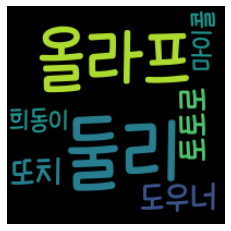

In [15]:
fig = plt.figure()
plt.imshow(wc, interpolation='bilinear')               ## 워드 클라우드 이미지로 출력한다 
plt.axis('off')
plt.show()

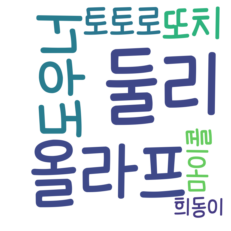

In [17]:
wc = WordCloud(
    font_path = myfontpath,
    background_color='white',                     ## 배경색을 지정한다 
    width = 800,
    height = 800
)
wc = wc.generate(text)
fig = plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

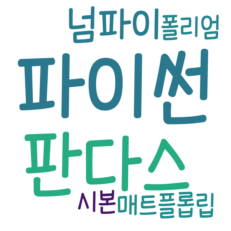

In [18]:
keywords = {'파이썬':7, '넘파이':3, '판다스':5, '매트플롭립':2, '시본':2, '폴리엄':2}             ## 특정 단어의 빈도를 딕셔너리로 만든다 

wc = wc.generate_from_frequencies(keywords)        ## 빈도별로 워드클라우드를 만든다 

fig = plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image                                ## 이미지 파일을 처리하는 모듈을 사용한다. 
import numpy as np

In [ ]:
r2d2_mask = np.array(Image.open('data/r2d2.JPG'))       ## 이미지를 읽어와서 다차원 배열로 변환한다 

In [ ]:
from wordcloud import STOPWORDS  

In [ ]:
stopwords = set()                               ## 한글은 별도로 집합으로 불용어를 만든다 
stopwords.add("은")
stopwords.add("입니다")
stopwords.add("것인가")
stopwords.add("처럼")

wc = WordCloud( stopwords=stopwords,              ## 워드 클라우드 객체를 만든다 
                          font_path = myfontpath,
                          background_color='white',
                           width = 800,
                           height = 800,
                          mask=r2d2_mask)            ## 마스크 인자에 이미지를 전달한다 

In [ ]:
texts = ['로봇 처럼 표시하는 것을 보기 위해 이것 은 예문 입니다 가을이라 겨울 바람 솔솔 불어오니 ',
         '여러분 의 문장을 넣 으세요 ㅎㅎㅎ 스타워즈 영화에 나오는 다양한 로봇처럼 r2d2']

In [ ]:
wc = wc.generate_from_text(texts[0]+texts[1])    ## 두 개의 문자을 연결해서 워드클라우드를 만든다 
wc

In [ ]:
wc.to_file('output/ptest3.png')

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")         ## 이미지를 출력하면 전달된 모양에 따라 표시한다 
plt.axis("off")
plt.show()

## 3. 한국어 기반의 자연어 처리 모듈 : nltk(Natural language -)

In [19]:
import nltk                     ## 한국어 자연어처리 모듈 

KeyboardInterrupt: 

In [21]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()

In [22]:
files_ko

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [23]:
doc_ko = kobill.open('1809898.txt').read()         ## 특정 텍스트 파일을 읽어온다 

In [24]:
doc_ko

"국군부대의 소말리아 해역 파견연장 동의안\n\n의안\n                                                                  제출연월일 :  2010.    11.    15.\n9898\n번호\n                                                                        제  출  자 :  정         부\n\n제안이유\n\n      소말리아 아덴만 해역에 파견된 국군부대 ( 청해부대 )의 파견기간이 \n2010년 12월 31일 종료될 예정이나,  다음 이유로 파견기간을 연장\n하고자 함. \n\n      첫째,  소말리아 해적활동으로 우리 선박의 안전이 위협을 받고 있고,\n\n      둘째,  청해부대가  성공적으로 임무를 수행하여 우리 국익보호 및  국위\n선양에 기여하고 있으며,   \n\n      셋째,  국내외 관계기관에서 파견연장을 요청하고 있음.\n\n주요내용\n\n    가. 유엔 안보리 결의 ( 1373/1838/1846/1851 )에 근거,  소말리아 아덴만 \n해역에 파견된 국군부대의 파견기간을 2011년 1월 1일부터 2011년 \n12월 31일까지 연장함.\n\n    나. 국군부대의 임무는 연합해군사의 해양안보작전에 참여하고,  우리 \n선박의 안전한 활동을 지원하는 것임.\n\n    다. 부대 지휘권은 한국군이 보유하며,  우리 선박 호송 간 작전운용은\n          한국군이 통제하고 연합해군사의 해양안보작전에 참여할 경우 현지 \n사령관이  전술통제함. \n\n    라. 국군부대의 파견경비는 우리 정부의 부담으로 함. \n\n참고사항\n\n    가.  관련법령 :  헌법 제5조 제1항,  제60조 제2항\n    나.  예산조치 :  국회 동의 후 2011년도 예산안에 대한 국회 심의 \n과정에서 반영 추진\n\n    다.  합    의 :  기획재정부,  외교통상부와 합의되었음.\n\n- 1 -\n\n\

In [25]:
from konlpy.tag import Okt      
t = Okt()
tokens_ko = t.nouns(doc_ko)                ## 텍스트에서 명사를 추출한다. 
print(tokens_ko[:10])

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']


In [ ]:
nouns_text = nltk.Text(tokens_ko, name='국군부대의 소말리아 해역 파견연장 동의안')       ## 명사로 추출한 것을 텍스트 객체로 만든다 

In [ ]:
nouns_text

In [ ]:
type(nouns_text)

In [ ]:
len(nouns_text.tokens)                         ##  명사로 분리된 개수를 확인한다 

In [ ]:
len(set(nouns_text.tokens))                   ## 유일한 단어의 개수를 확인한다 

In [ ]:
nouns_text.tokens[:10]

In [ ]:
nouns_text.vocab()                    ## 동일한 단어의 발생 빈도를 확인한다. 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [ ]:
plt.figure(figsize=(12,6))
nouns_text.plot(50)                         ## 단어별로 발생빈도에 맞도록 그래프를 그린다. 

In [ ]:
nouns_text.count('파견')                  ## 특정 단어의 발생빈도를 확인한다. 

In [ ]:
nouns_text.count('소말리아')

In [ ]:
nouns_text.concordance('소말리아')             ## 특정 단어가 있는 곳 리턴

In [ ]:
data = nouns_text.vocab().most_common(150)                 ## 가장 많이 발생한 단어를 선택한다. 

In [ ]:
print(data)

In [ ]:
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [ ]:
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      colormap = 'coolwarm',
                      mask=r2d2_mask
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [ ]:
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      colormap = 'plasma',
                      mask=np.array(Image.open('images/clover.jpg'))
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [ ]:
?WordCloud

## 4. 텍스트 전처리

### **한국어 전처리 패키지 : PyKoSpacing & Py-Hanspell**
#### 전희원님이 개발한 PyKoSpacing은 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지이다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있다.

##### pip install git+https://github.com/haven-jeon/PyKoSpacing.git
##### pip install git+https://github.com/ssut/py-hanspell.git

In [26]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [27]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [28]:
from pykospacing import spacing

kospacing_sent = spacing(new_sent)
print(sent) #띄어쓰기가 원래 돼 있는 상태
print(kospacing_sent) #

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


In [29]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [30]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) 

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


## 5. 카운트 기반의 단어 표현

### 토큰화 : 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 한다.

#### 방법(1) - nltk 패키지의 word_tokenize() 사용

In [ ]:
from nltk.tokenize import word_tokenize 

corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
word_tokens1 = word_tokenize(example)
print(word_tokens1) 

#### 방법(2) - Okt 객체의 morphs() 사용

In [ ]:
from konlpy.tag import Okt
t = Okt()  
corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."  
word_tokens2 = t.morphs(corpus)  
print(word_token2)

In [ ]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens1: 
    if w not in stop_words: 
        result.append(w) 

print(result)

In [ ]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens2: 
    if w not in stop_words: 
        result.append(w) 

print(result)

#### 방법(3) - Okt 객체의 nouns() 사용

In [ ]:
from konlpy.tag import Okt
t = Okt()  
corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."  
word_tokens3 = t.nouns(corpus)  
print(word_tokens3)

In [ ]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens3: 
    if w not in stop_words: 
        result.append(w) 

print(result)

In [ ]:
from konlpy.tag import Okt
t = Okt()  
corpus = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다"  
word_tokens3 = t.morphs(corpus)  
print(word_tokens3)
nouns_text = nltk.Text(word_tokens3)
nouns_text.vocab()   

### 한국어 불용어 참조 사이트 : https://www.ranks.nl/stopwords/korean
----

## 카운트 기반의 단어 표현

### Bag of Words란 단어들의 순서는 고려하지 않고, 단어들의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법
### DTM(또는 TDM)은 BoW 의 확장으로서 TF 방법과 TF_IDF 방식으로 생성 가능
### TF-IDF 는 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 주는 방법 

### 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다"]
vector = CountVectorizer()
r = vector.fit_transform(corpus).toarray()
print(r) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(r.shape)
print(vector.vocabulary_)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다"]
vector = CountVectorizer(stop_words=["정부가", "소비자가"])
r = vector.fit_transform(corpus).toarray()
print(r) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(r.shape)
print(vector.vocabulary_)

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해

In [ ]:
corpus = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

In [ ]:
vector = CountVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) 
print(vector.vocabulary_) # 각 단어들의 인덱스가 어떻게 부여되었는지를 보여준다.

In [ ]:
tf = pd.DataFrame(dtm, columns = vector.get_feature_names())
display(tf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) 
print(vector.vocabulary_) # 각 단어들의 인덱스가 어떻게 부여되었는지를 보여준다.

In [ ]:
tfidf = pd.DataFrame(dtm, columns = vector.get_feature_names())
display(tfidf)

In [ ]:
corpus = [
           "커피 파스타 치킨 샐러드 아이스크림",
           "커피 우동 소고기김밥 귤",
           "참치김밥 커피 오뎅",
           "샐러드 피자 파스타 콜라",
           "티라무슈 햄버거 콜라",
           "파스타 샐러드 커피"    
]
vector = CountVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) 
tf = pd.DataFrame(dtm, columns = vector.get_feature_names())
display(tf)

In [ ]:
com = dtm.T @ dtm  # 동시 출현횟수

In [ ]:
comdf = pd.DataFrame(com, columns = vector.get_feature_names(), index = vector.get_feature_names())
display(comdf)

In [ ]:
d1 = "aaa bbb ccc"
d2 = "aaa bbb ddd"
d3 = "aaa bbb ccc"
d4 = "xxx yyy zzz"
dd = [d1, d2, d3, d4]

In [ ]:
vector = CountVectorizer()
dtm = vector.fit_transform(dd).toarray()
print(dtm) 
print(vector.vocabulary_)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(dtm, dtm)
print(similarity_simple_pair)


## 5. 한글 자모 분해와 결합

In [ ]:
import hgtk                      ## 한글의 자음과 모음을 분리하는 모듈을 사용한다 

### 한글 자모 분해, 조합(오토마타), 조사 붙이기, 초/중/종 분해조합, 한글/한자/영문 여부 체크 등을 지원합니다.

In [ ]:
hgtk.letter.decompose('감')          ## 특정 글자를 분리하면 초성 중성 종성으로 분리된다 

In [ ]:
hgtk.letter.compose('ㄱ', 'ㅏ', 'ㅁ')      ## 분리된 글자를 하나의 글자로 합친다. 

In [ ]:
sample_text = '''타밀어는 드라비다어족의 남부 계통, 즉 남부드라비다어파에 속하는 언어이다.
공식어로 지정된 인도의 주요 언어 중에서 타밀어와 계통적으로 가장 가까운 것은 말라얄람어인데, 
9세기 무렵까지 말라얄람어는 타밀어의 방언이었다.
이 두 언어 간에는 선사 시대에 일어난 서부 방언(말라얄람어의 원형) 분열의 증거가 되는 많은 차이가 있지만, 
13~14세기 무렵까지도 두 언어는 완전히 서로 다른 언어로 분리되지 않은 채였다.'''

In [ ]:
s = hgtk.text.decompose(sample_text)        ## 여러 문장에 대해 단어를 분리한다. 

In [ ]:
s[:40]

In [ ]:
hgtk.text.compose(s)[:40]                     ## 분리된 것을 하나로 합친다. 

In [ ]:
hgtk.checker.is_hangul('한글입니다')           ## 한글 여부를 확인한다 

In [ ]:
hgtk.checker.is_hangul('no한글입니다')         ## 일부 영어가 들어가면 한글로 인식하지 않는다 

In [ ]:
hgtk.checker.is_hangul('it is english')

In [ ]:
hgtk.checker.is_hanja('大韓民國')                  ## 한자도 확인할 수 있다. 

In [ ]:
hgtk.checker.is_hanja('大한민국')

In [ ]:
hgtk.checker.is_hanja('대한민국')

## Josa
EUN_NEUN - 은/는

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.EUN_NEUN)                 ## 단어에 맞는 조사를 붙여볼 수 있다. 

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.EUN_NEUN)

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.I_GA)

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.I_GA)

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.EUL_REUL)

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.EUL_REUL)

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
text = '태양계는 지금으로부터 약 46억 년 전, 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다'

okt.pos(text)

In [ ]:
okt.morphs(text)

In [ ]:
okt.nouns(text)

## 한글 단어 분석을 위한 패키지 준비

In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [ ]:
filename = 'etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
inputFileName = 'data/'+filename
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

### 1-2. 분석할 데이터 추출

In [ ]:
message = ''

for item in data:
    if 'message' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
        
message #출력하여 내용 확인

### 1-3. 품사 태깅 : 명사 추출

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(message_N)

count   #출력하여 내용 확인

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

### 히스토그램

In [ ]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

In [ ]:
word_count

### 워드클라우드

In [ ]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()